# MATLAB/Octave Bridge mit Python

✅ Octave gefunden unter: /snap/bin/octave
📁 Snap-Umgebung erkannt – verwende Arbeitsverzeichnis: /home/fritz/octave_tmp
🎨 Initialisiere Octave-Graphics Toolkit...
📊 Fallback: Gnuplot-Toolkit aktiviert (Ausgabe unterdrückt).
🚀 Oct2Py-Session gestartet.


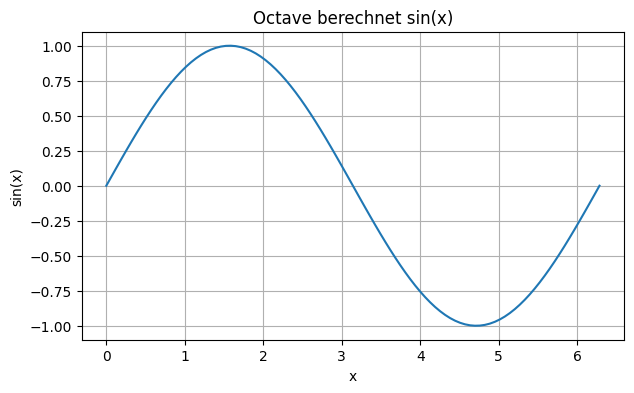

Ergebnis der Octave-Funktion: [ 3.  0. -1.  0.  3.]
🧹 Oct2Py-Session beendet.


In [11]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from oct2py import Oct2Py

def detect_octave_path():
    for path in ["/usr/bin/octave", "/usr/local/bin/octave", "/snap/bin/octave", shutil.which("octave")]:
        if path and os.path.exists(path):
            return path
    raise FileNotFoundError("Kein Octave-Interpreter gefunden.")

octave_path = detect_octave_path()
print(f"✅ Octave gefunden unter: {octave_path}")

if "/snap/" in octave_path:
    temp_dir = os.path.expanduser("~/octave_tmp")
    os.makedirs(temp_dir, exist_ok=True)
    print(f"📁 Snap-Umgebung erkannt – verwende Arbeitsverzeichnis: {temp_dir}")
else:
    temp_dir = None
    print("🧩 Klassische Umgebung erkannt – Standard-/tmp wird genutzt.")

octave = Oct2Py()
if temp_dir:
    octave.temp_dir = temp_dir

print("🎨 Initialisiere Octave-Graphics Toolkit...")
try:
    octave.eval("graphics_toolkit('qt');", verbose=False)
    print("✅ Qt-Toolkit aktiviert.")
except Exception:
    octave.eval("graphics_toolkit('gnuplot');", verbose=False)
    print("📊 Fallback: Gnuplot-Toolkit aktiviert (Ausgabe unterdrückt).")

print("🚀 Oct2Py-Session gestartet.")

# Beispiel 1 – Sinusfunktion berechnen
x = np.linspace(0, 2*np.pi, 100)
y = octave.feval("sin", x)

y = np.array(y).squeeze()

plt.figure(figsize=(7, 4))
plt.plot(x, y)
plt.title("Octave berechnet sin(x)")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.show()

# Beispiel 2 – Eigene Octave-Funktion definieren
octave.eval("""
function y = parabola(x)
    y = x.^2 - 4*x + 3;end
""")
result = np.array(octave.feval("parabola", [0, 1, 2, 3, 4])).squeeze()
print("Ergebnis der Octave-Funktion:", result)

octave.exit()
print("🧹 Oct2Py-Session beendet.")